# Actividad 1: Conceptos generales de redes neuronales
En esta actividad vamos a revisar algunos de los conceptos basicos de las redes neuronales, pero no por ello menos importantes.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en este enlace.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, asegúrate de que los resultados de ejecutar tu código han quedado guardados (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

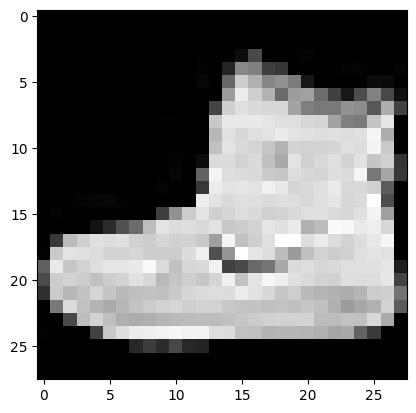

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy utiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas que las imágenes cómo eran las imagenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten sólo toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 1 (3.5 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [6]:
### Tu código para la red neuronal de la pregunta 1 aquí ###
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.optimizers import Adam


model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


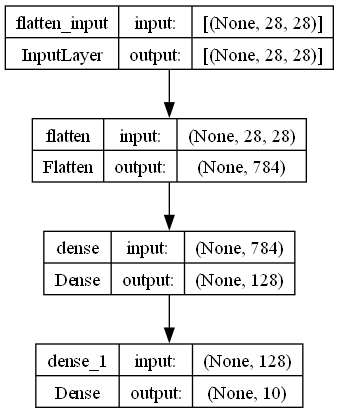

In [8]:
tf.keras.utils.plot_model(model,to_file="red.png",show_shapes=True)

In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=["accuracy"])

In [10]:
# dividimos la data de prueba para 
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(training_images,training_labels,test_size=0.2,random_state=42)
print(f'Número de elementos para entrenar {X_train.shape[0]}')
print(f'Número de elementos para validar {X_valid.shape[0]}')


Número de elementos para entrenar 48000
Número de elementos para validar 12000


In [11]:
history=model.fit(training_images,training_labels,epochs=10,validation_data=(X_valid,y_valid),verbose=1,batch_size=64)

Epoch 1/10
938/938 [==============================] - 5s 2ms/step - loss: 0.5883 - accuracy: 0.8042 - val_loss: 0.4480 - val_accuracy: 0.8401
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4107 - accuracy: 0.8541 - val_loss: 0.3773 - val_accuracy: 0.8625
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3737 - accuracy: 0.8655 - val_loss: 0.3829 - val_accuracy: 0.8579
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3498 - accuracy: 0.8742 - val_loss: 0.3380 - val_accuracy: 0.8775
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3306 - accuracy: 0.8801 - val_loss: 0.3197 - val_accuracy: 0.8863
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3169 - accuracy: 0.8858 - val_loss: 0.2987 - val_accuracy: 0.8902
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3035 - accuracy: 0.8902 - val_loss: 0.2945 - val_accuracy: 0.8911
Epoch 

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [12]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###
model.evaluate(test_images,test_labels,verbose=2)

313/313 - 0s - loss: 0.3403 - accuracy: 0.8765 - 469ms/epoch - 1ms/step


[0.34030699729919434, 0.8765000104904175]

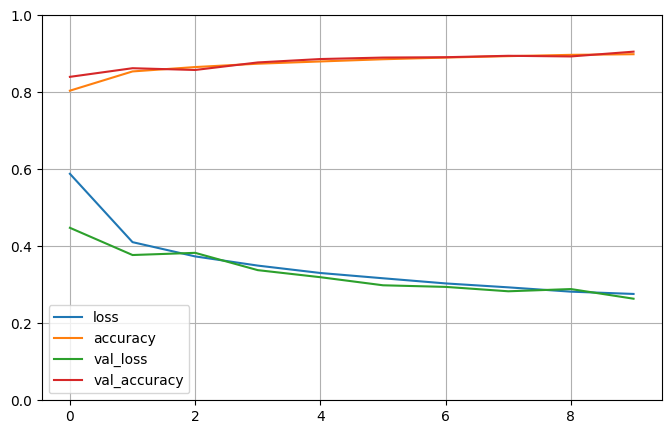

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

# **Ejercicio 1: Funcionamiento de las predicción de la red neuronal**

Para este primer ejercicio sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador para las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [17]:
### Tu código del clasificador de la pregunta 3 aquí ###
classifications=model.predict(test_images)

313/313 [==============================] - 0s 853us/step


In [18]:
print(classifications[0])

[7.1422655e-06 2.1618015e-07 3.4236476e-07 1.9156146e-06 5.9746071e-06 2.2240996e-02 2.6312679e-05 4.2019360e-02 5.2697177e-04 9.3517077e-01]


In [19]:
classes=np.argmax(classifications,axis=1)
print(f'Predict {classes[0]} True label {test_labels[0]}')

Predict 9 True label 9


Tu respuesta a la pregunta 3.1 aquí:

### Respuesta
Ese vector de números representa el porcentaje de pertenencia a dicha clase, el numero que tenga el valor mas grande indica la posición del arreglo a la que pertenece esa clase, el numero mas alto es de 0.886 que se encuentra en el índice del número nueve

Tu respuesta a la pregunta 3.2 aquí:

### Respuesta
El valor de la clase es 9 que representa <b> 9 Ankle boot </b>


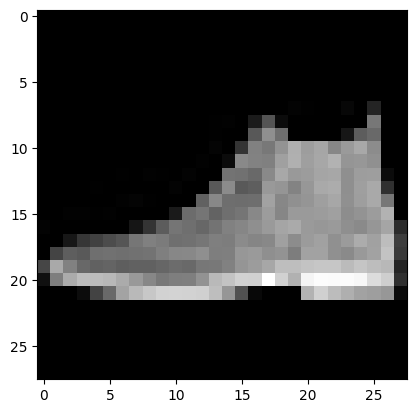

In [20]:
np.set_printoptions(linewidth=200)
plt.imshow(test_images[0], cmap="gray")

# **Ejercicio 2: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **pregunta 4.1 (0.25 puntos)**: 512 neuronas en la capa oculta
* **pregunta 4.2 (0.25 puntos)**:1024 neuronas en la capa oculta

y entrena la red en ambos casos.

**pregunta 4.3 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

In [21]:
### Tu código para 512 neuronas aquí ###
model502=Sequential()
model502.add(Flatten(input_shape=(28,28)))
model502.add(Dense(512,activation='sigmoid'))
model502.add(Dense(10,activation='softmax'))

model502.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=["accuracy"])
history502=model502.fit(training_images,training_labels,epochs=10,validation_data=(X_valid,y_valid),verbose=1,batch_size=64)
model502.evaluate(test_images,test_labels,verbose=2)


Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5305 - accuracy: 0.8144 - val_loss: 0.4118 - val_accuracy: 0.8506
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4015 - accuracy: 0.8556 - val_loss: 0.3755 - val_accuracy: 0.8637
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3637 - accuracy: 0.8677 - val_loss: 0.3407 - val_accuracy: 0.8746
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3378 - accuracy: 0.8765 - val_loss: 0.3141 - val_accuracy: 0.8852
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3165 - accuracy: 0.8843 - val_loss: 0.2943 - val_accuracy: 0.8933
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2986 - accuracy: 0.8894 - val_loss: 0.2865 - val_accuracy: 0.8940
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2828 - accuracy: 0.8954 - val_loss: 0.2593 - val_accuracy: 0.9039
Epoch 

[0.33871185779571533, 0.8810999989509583]

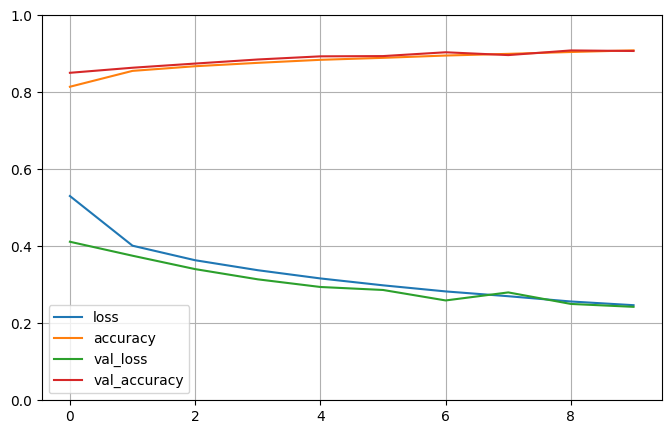

In [22]:
pd.DataFrame(history502.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
### Tu código para 1024 neuronas aquí ###
model1024=Sequential()
model1024.add(Flatten(input_shape=(28,28)))
model1024.add(Dense(1024,activation='sigmoid'))
model1024.add(Dense(10,activation='softmax'))

model1024.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=["accuracy"])
history1024=model1024.fit(training_images,training_labels,epochs=10,validation_data=(X_valid,y_valid),verbose=1,batch_size=64)
model1024.evaluate(test_images,test_labels,verbose=2)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5197 - accuracy: 0.8152 - val_loss: 0.4249 - val_accuracy: 0.8495
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4031 - accuracy: 0.8548 - val_loss: 0.3649 - val_accuracy: 0.8675
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3622 - accuracy: 0.8683 - val_loss: 0.3224 - val_accuracy: 0.8814
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3357 - accuracy: 0.8780 - val_loss: 0.3145 - val_accuracy: 0.8858
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3118 - accuracy: 0.8856 - val_loss: 0.2910 - val_accuracy: 0.8919
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2947 - accuracy: 0.8916 - val_loss: 0.2756 - val_accuracy: 0.8977
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2790 - accuracy: 0.8963 - val_loss: 0.2572 - val_accuracy: 0.9044
Epoch 

[0.322246789932251, 0.8810999989509583]

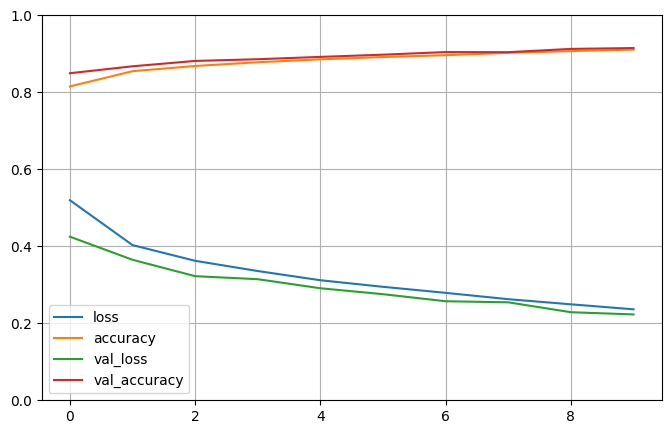

In [24]:
pd.DataFrame(history1024.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Tu respuesta a la pregunta 4.3 aquí:

### Respuesta
El mayor impacto que tenemos es la rapidez de convergencia, en la primera red neuronal el valor de precisión cuesta que llegue al valor 90 o mayor. Por otro lado, las que tienen las capas ocultas con más neuronas dan un mayor valor de precisión. Lo que se puede notar que no es tan necesaria tantas neuronas ya que las épocas cubren el nivel de precisión para que supere el 80% que es el objetivo y gastamos menos recursos. 

#### Riesgos
Lo importante no es hacer un sobreajuste por lo que podría estar sesgado a que solo identifique los valores de entrenamiento, considero que la mejor modelo sería el de 512 para optimizar recursos. 



Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 5.1 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 5.1 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto?

In [25]:
### Tu código del clasificador de la pregunta 5 aquí ###
classifications502=model502.predict(test_images)
classes=np.argmax(classifications502,axis=1)
print(f'Predict {classes[0]} True label {test_labels[0]}')

313/313 [==============================] - 0s 710us/step
Predict 9 True label 9


In [26]:
classifications1024=model1024.predict(test_images)
classes=np.argmax(classifications1024,axis=1)
print(f'Predict {classes[0]} True label {test_labels[0]}')

313/313 [==============================] - 0s 886us/step
Predict 9 True label 9


Tu respuesta a la pregunta 5.1 aquí:

### Respuesta
En ambos resultados la clase es la misma, la clase 9

Tu respuesta a la pregunta 5.2 aquí:

### Respuesta 
Todas las redes tienen un buen nivel de precisión, esto quiere decir que ambos modelos han aprendido a reconocer de manera satisfactoria los patrones que detallan a una <b>Ankle boot </b>. 

# **Ejercicio 3: ¿por qué es tan importante la capa Flatten?**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 6 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [30]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###
model_without_flatten=Sequential()
model_without_flatten.add(Dense(128,activation='sigmoid'))
model_without_flatten.add(Dense(10,activation='softmax'))
model_without_flatten.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=["accuracy"])

model_without_flatten.fit(training_images,training_labels,epochs=10,validation_data=(X_valid,y_valid),verbose=1,batch_size=64)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'Equal' defined at (most recent call last):
    File "C:\Program Files\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Program Files\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Program Files\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Program Files\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\marvi\AppData\Local\Temp\ipykernel_51204\2417931498.py", line 7, in <module>
      model_without_flatten.fit(training_images,training_labels,epochs=10,validation_data=(X_valid,y_valid),verbose=1,batch_size=64)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\keras\engine\training.py", line 998, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\keras\engine\training.py", line 1092, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\keras\metrics\base_metric.py", line 143, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\keras\metrics\base_metric.py", line 700, in update_state
      matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\keras\metrics\metrics.py", line 3669, in sparse_categorical_accuracy
      matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "d:\unir\segundo\sc\sistemas-cognitivos-artificiales\red-neuronal\lib\site-packages\keras\utils\metrics_utils.py", line 970, in sparse_categorical_matches
      matches = tf.cast(tf.equal(y_true, y_pred), backend.floatx())
Node: 'Equal'
required broadcastable shapes
	 [[{{node Equal}}]] [Op:__inference_train_function_200793]

Tu respuesta a la pregunta 6 aquí:

### Respuesta 
Este error es porque la red neuronal no sabe como convertir la matriz de 2D a un vector, no tiene definido un el tamaño para poder formar el vector. Esto es necesario ya que la capa de Dense requiere un arreglo de una dimensión para poder trabajar. 

# **Ejercicio 4: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 7.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 7.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [31]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###
model_layers=Sequential()
model_layers.add(Flatten(input_shape=(28,28)))
model_layers.add(Dense(128,activation='sigmoid'))
model_layers.add(Dense(5,activation='softmax'))

model_layers.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=["accuracy"])
history_layers=model_layers.fit(training_images,training_labels,epochs=10,validation_data=(X_valid,y_valid),verbose=1,batch_size=64)
model_layers.evaluate(test_images,test_labels,verbose=2)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1002
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1002
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1002
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1002
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1002
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1002
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1002
Epoch 8/10
938/938 [============================

[nan, 0.10000000149011612]

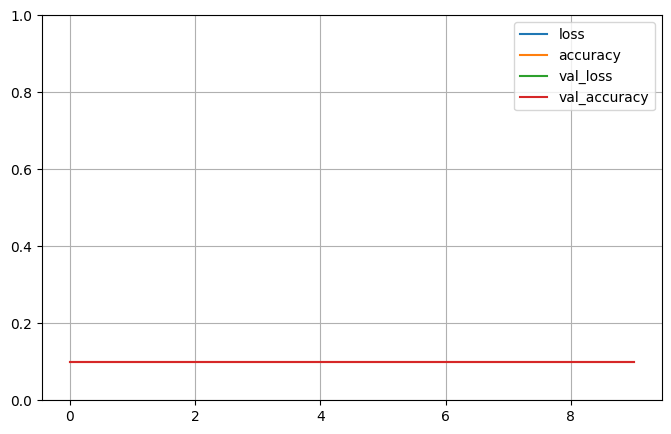

In [32]:
pd.DataFrame(history_layers.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Tu respuestas a la pregunta 7.1 aquí:

### Respuesta
Son 10 neuronas que representan a cada una de las salidas del modelo, debe de existir una salida por cada clase que se tenga en el modelo. Cada una produce un porcentaje de probabilidad para pertenecer a esa clase en particular. 

Tu respuestas a la pregunta 7.2 aquí:

### Respuesta
Al realizar el cambio de clases a menos clases podemos visualizar que el modelo no aprende, esto ocurre a que no tiene el suficiente grupo de salidas, no puede clasificar correctamente ya que no se puede representar todas las clases. El modelo intenta agrupar las 10 clases en 5 por lo que causará confusión. El resultado muestra que no supera la precisión del 10%.

# Ejercicio 5: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 8.1 (0.20 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 8.2 (0.20 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 8.3 (0.60 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [33]:
### Tu código para 15 epoch aquí ###
model_15epoch=Sequential()
model_15epoch.add(Flatten(input_shape=(28,28)))
model_15epoch.add(Dense(128,activation='sigmoid'))
model_15epoch.add(Dense(10,activation='softmax'))

model_15epoch.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=["accuracy"])
history_15epoch=model_15epoch.fit(training_images,training_labels,epochs=15,validation_data=(X_valid,y_valid),verbose=1,batch_size=64)
model_15epoch.evaluate(test_images,test_labels,verbose=2)


Epoch 1/15
938/938 [==============================] - 2s 2ms/step - loss: 0.5920 - accuracy: 0.8016 - val_loss: 0.4452 - val_accuracy: 0.8385
Epoch 2/15
938/938 [==============================] - 2s 2ms/step - loss: 0.4125 - accuracy: 0.8534 - val_loss: 0.3845 - val_accuracy: 0.8620
Epoch 3/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3728 - accuracy: 0.8673 - val_loss: 0.3520 - val_accuracy: 0.8712
Epoch 4/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3492 - accuracy: 0.8739 - val_loss: 0.3296 - val_accuracy: 0.8800
Epoch 5/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3303 - accuracy: 0.8810 - val_loss: 0.3207 - val_accuracy: 0.8812
Epoch 6/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3164 - accuracy: 0.8862 - val_loss: 0.2969 - val_accuracy: 0.8915
Epoch 7/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3025 - accuracy: 0.8905 - val_loss: 0.2932 - val_accuracy: 0.8917
Epoch 

[0.3250025510787964, 0.8831999897956848]

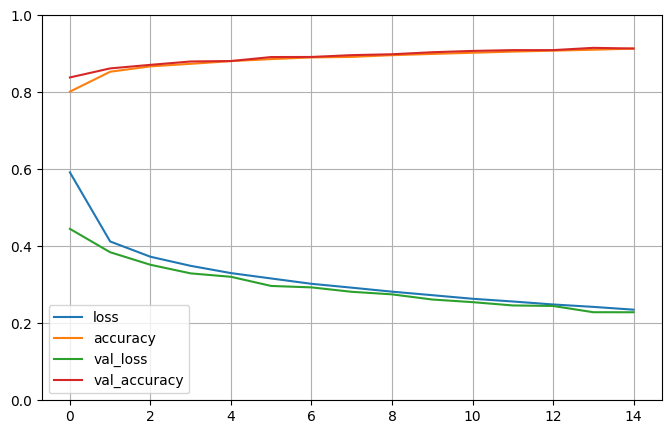

In [34]:
pd.DataFrame(history_15epoch.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [35]:
### Tu código para 30 epoch aquí ###
model_30epoch=Sequential()
model_30epoch.add(Flatten(input_shape=(28,28)))
model_30epoch.add(Dense(128,activation='sigmoid'))
model_30epoch.add(Dense(10,activation='softmax'))

model_30epoch.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=["accuracy"])
history_30epoch=model_30epoch.fit(training_images,training_labels,epochs=30,validation_data=(X_valid,y_valid),verbose=1,batch_size=64)
model_30epoch.evaluate(test_images,test_labels,verbose=2)

Epoch 1/30
938/938 [==============================] - 2s 2ms/step - loss: 0.5926 - accuracy: 0.8011 - val_loss: 0.4493 - val_accuracy: 0.8350
Epoch 2/30
938/938 [==============================] - 2s 2ms/step - loss: 0.4115 - accuracy: 0.8533 - val_loss: 0.3916 - val_accuracy: 0.8585
Epoch 3/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3733 - accuracy: 0.8665 - val_loss: 0.3485 - val_accuracy: 0.8727
Epoch 4/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3490 - accuracy: 0.8738 - val_loss: 0.3409 - val_accuracy: 0.8743
Epoch 5/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3296 - accuracy: 0.8801 - val_loss: 0.3205 - val_accuracy: 0.8852
Epoch 6/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3151 - accuracy: 0.8857 - val_loss: 0.2978 - val_accuracy: 0.8917
Epoch 7/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3027 - accuracy: 0.8900 - val_loss: 0.3191 - val_accuracy: 0.8809
Epoch 

[0.31912943720817566, 0.8907999992370605]

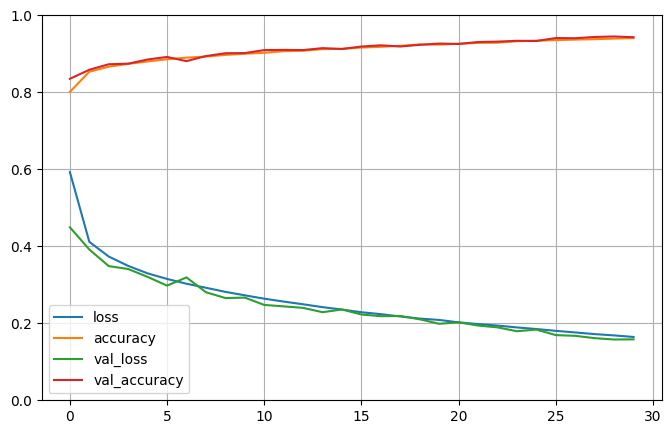

In [36]:
pd.DataFrame(history_30epoch.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Tu respuesta a la pregunta 8.3 aquí:

### Respuesta
En este caso cuando el modelo pasa muchas épocas más de las necesarias puede pasar que sufra un overfitting, el modelo empieza a aprender no solo los patrones generales, se acopla mucho a los datos de entrada que al momento de evaluarlos con otro conjunto de datos se genera ruido. El rendimiento en el conjunto de validación empeora, convergiendo a un punto en donde no mejore el modelo significativamente. 

# Ejercicio 6: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del ejemplo de código que

 se da, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para
evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True
      

**Pregunta 9 (2 puntos)**: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [42]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###
class myCallback(tf.keras.callbacks.Callback):
    def on_test_batch_end(self, batch, logs=None):
        print(
            "Validación - En el batch {}, el promedio de la perdida es {:4.2f} "
            "y el del accuracy es {:4.2f}".format(batch, logs["loss"], logs["accuracy"])
        )
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('loss')>0.4):
            print("\nAlcanzando el 40% de perdida, se cancela el entrenamiento!!")
            self.model.stop_training=True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.10.0
Epoch 1/50
1863/1875 [============================>.] - ETA: 0s - loss: 0.4734 - accuracy: 0.8287
Alcanzando el 40% de perdida, se cancela el entrenamiento!!
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4729 - accuracy: 0.8289
